In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [23]:
df = pd.read_csv('Loan_data.csv')

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df = df.dropna()

# Change All Categorical String To Categorical Int

In [29]:
df['Loan_Status'] = df['Loan_Status'].replace(to_replace=['Y','N'], value=['Yes','No'])

In [47]:
df = df.replace(to_replace=['Yes','No'], value=[1,0])
df['Education'] = df['Education'].replace(to_replace=['Graduate','Not Graduate'], value=[1,0])
df['Gender'] = df['Gender'].replace(to_replace=['Male','Female'], value=[1,0])
df['Property_Area'] = df['Property_Area'].replace(to_replace=['Rural', 'Urban', 'Semiurban'], value=[0,1,2])

In [50]:
# 0 = No 1 = Yes
# Preperty Area 0 : Rural, 1 : Urban, 2 : SemiUrban
# Gender 1 : Male, 0 : Female

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [52]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [57]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [54]:
# Because 3+ is not categorical change to 4
df['Dependents'] = df['Dependents'].replace(to_replace='3+', value='4')

<AxesSubplot:xlabel='Education', ylabel='count'>

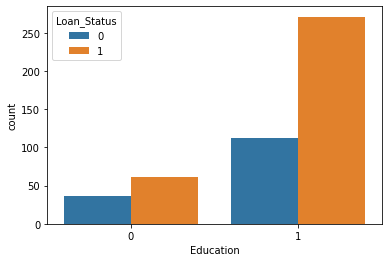

In [55]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

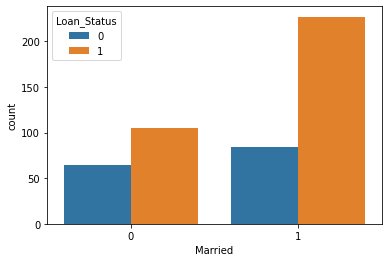

In [56]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [59]:
X = df.drop(columns = ['Loan_ID','Loan_Status'])
Y = df['Loan_Status']

In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify = Y, random_state=48)

# SVM

In [63]:
svml = svm.SVC(kernel='linear')

In [64]:
svml.fit(X_train,Y_train)

SVC(kernel='linear')

In [65]:
pred = svml.predict(X_test)

In [66]:
accuracy_score(pred, Y_test)

0.78125

# Random Forest

In [72]:
rfc = RandomForestClassifier(n_estimators=1000)

In [73]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

In [74]:
predict_rfc = rfc.predict(X_test)

In [75]:
accuracy_score(predict_rfc,Y_test)

0.8020833333333334